In [1]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/Concrete_Data.xls"

In [2]:
import pandas as pd
original_data = pd.read_excel(url)
original_data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [3]:
original_data.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [4]:
#rename columns for simplification
names = ['Cement', 'Blast_Furnace','Fly_Ash','Water','Superplasticizer',\
         'Coarse_Aggregate','Fine_Aggregate','Age','compressive_strength']

In [5]:
data = pd.read_excel(url,names=names)
data.head()

,Cement,Blast_Furnace,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [6]:
data.shape

(1030, 9)

In [7]:
# Step 1 Lets analyze data
data.describe()

,Cement,Blast_Furnace,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,compressive_strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [8]:
# Step 2 -Lets run Linear regression from stats model library
import statsmodels.regression.linear_model as sm

In [9]:
x2=data[['Cement', 'Blast_Furnace','Fly_Ash','Water','Superplasticizer','Coarse_Aggregate','Fine_Aggregate','Age']]
y2=data[['compressive_strength']]

In [10]:
x2c = sm.add_constant(x2)#Stats model does not fit intercept by default
step2model=sm.OLS(y2,x2c)
step2result = step2model.fit()

In [11]:
print(step2result.summary())

                             OLS Regression Results                             
Dep. Variable:     compressive_strength   R-squared:                       0.615
Model:                              OLS   Adj. R-squared:                  0.612
Method:                   Least Squares   F-statistic:                     204.3
Date:                  Fri, 16 Feb 2018   Prob (F-statistic):          6.76e-206
Time:                          17:09:36   Log-Likelihood:                -3869.0
No. Observations:                  1030   AIC:                             7756.
Df Residuals:                      1021   BIC:                             7800.
Df Model:                             8                                         
Covariance Type:              nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -

Lets understand result summary of step-2
1)step1result R-Squared is low,
2)Global F test is significant,
3)Durbin-Watson statistic shows +ve autocorrelation between error,
4)Partial t test for Intercept,Coarse_Aggregate,Fine_Aggregateis insignificant,


In [12]:
#  Lets build a function to calculate Variance Inflation Factor (VIF) 
def vif_cal(input_data):
    x_vars=input_data
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        x = sm.add_constant(x)
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        print (xvar_names[i] ," VIF = " , vif)

In [13]:
vif_cal(x2)

Cement  VIF =  7.49
Blast_Furnace  VIF =  7.28
Fly_Ash  VIF =  6.17
Water  VIF =  7.0
Superplasticizer  VIF =  2.97
Coarse_Aggregate  VIF =  5.08
Fine_Aggregate  VIF =  7.01
Age  VIF =  1.12


VIF is greater than 5 shows multicollinearity exists in data

In [14]:
import matplotlib.pyplot as plt
import numpy as np

In [15]:
y_hat2=step2result.predict(x2c)
df_yhat2=pd.DataFrame(y_hat2)
df_y2=pd.DataFrame(y2)
e2=(df_yhat2).values-(df_y2).values

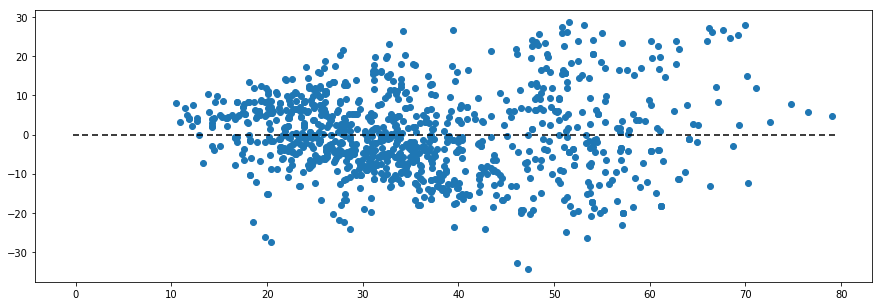

In [16]:
# Create Residual plot (e Vs y_hat)
d = pd.DataFrame(np.zeros((80,1)))
plt.figure(figsize=(15,5))
plt.scatter(df_yhat2,e2)
plt.scatter(range(0,80),d,c='k',marker='_')
plt.show()

Density of plot varies from left to right. Which indicate non constant variance.   

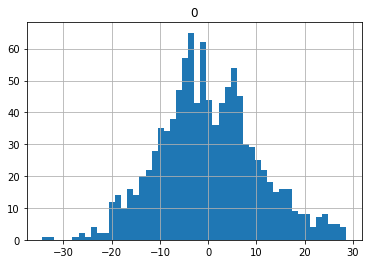

In [17]:
# Lets plot histogram of residuals
e_2=pd.DataFrame(e2)
e_2.hist(bins=50)
plt.show()

This histogram looks like bimodal which is not normal

In [18]:
import scipy
scipy.stats.shapiro(e2)
# Normality test with p 0.0029 shows same

(0.9953229427337646, 0.002990775741636753)

Lets remove variables which were in significant in partial t test. 
That will exclude Coarse_Aggregate,Fine_Aggregate,Intercept and re run model.

Lets calculate Mahalonobis Distance (MD) which is to detect multivariate data outliers

In [19]:
# Again there is no stadard fucntion to calculate MD. Lets build one
def MD_cal(input_data):
    mu=input_data.mean().values
    import numpy as np
    covmx = input_data.cov()
    invcovmx = np.linalg.inv(covmx)
    x_vars=input_data
    xvar_names=x_vars.columns
    ys=x_vars[xvar_names].values.tolist()
    
   
    md = []
    for i in range(0,1029):
        md.append(np.dot(np.dot((ys[i]-mu),invcovmx),(ys[i]-mu).T))
    return md
        

In [20]:
x2_MD=x2.copy()

In [21]:
x2_MD['MD']=pd.DataFrame(MD_cal(x2))

In [22]:
x2_MD.head()

,Cement,Blast_Furnace,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,MD
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,13.075513
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,12.275470
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,16.505354
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,28.550092
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,30.456028


As MD follows chisquare distribution critical value for 8 df is 26.13. so rows where MD>26.13 is multivariate outlier

In [23]:
# Lets remove variables which were insignificant from partial t test (Intercept,x6(Coarse_Aggregate),x7(Fine_Aggregate))
x3=data[['Cement', 'Blast_Furnace','Fly_Ash','Water','Superplasticizer','Age']]
y3=data[['compressive_strength']] # y3 and y2 are same

In [25]:
import statsmodels.regression.linear_model as sm
step3model=sm.OLS(y3,x3)
step3result = step3model.fit()

In [26]:
print(step3result.summary())

                             OLS Regression Results                             
Dep. Variable:     compressive_strength   R-squared:                       0.928
Model:                              OLS   Adj. R-squared:                  0.927
Method:                   Least Squares   F-statistic:                     2196.
Date:                  Fri, 16 Feb 2018   Prob (F-statistic):               0.00
Time:                          17:10:25   Log-Likelihood:                -3894.4
No. Observations:                  1030   AIC:                             7801.
Df Residuals:                      1024   BIC:                             7830.
Df Model:                             6                                         
Covariance Type:              nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Cement              

In [27]:
vif_cal(x3)

Cement  VIF =  1.87
Blast_Furnace  VIF =  1.75
Fly_Ash  VIF =  2.33
Water  VIF =  1.93
Superplasticizer  VIF =  2.42
Age  VIF =  1.11


In [28]:
y_hat3=step3result.predict(x3)
df_yhat3=pd.DataFrame(y_hat3)
df_y3=pd.DataFrame(y3)
e3=(df_yhat3).values-(df_y3).values

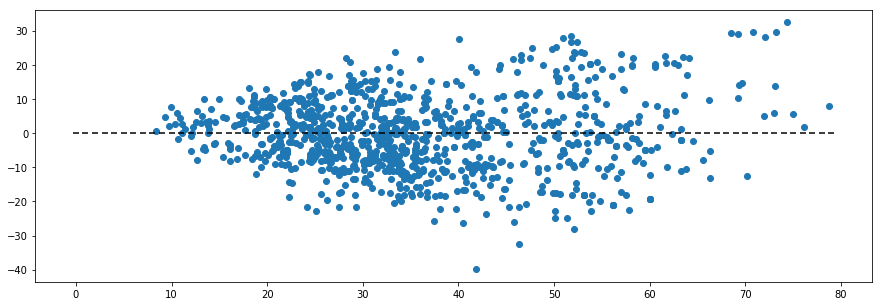

In [29]:
# Create Residual plot (e Vs y_hat)
d = pd.DataFrame(np.zeros((80,1)))
plt.figure(figsize=(15,5))
plt.scatter(df_yhat3,e3)
plt.scatter(range(0,80),d,c='k',marker='_')
plt.show()

1)Residual plot shows still there is non constant variance, 2) VIF calculation shows Multicollinearity has been taken care of

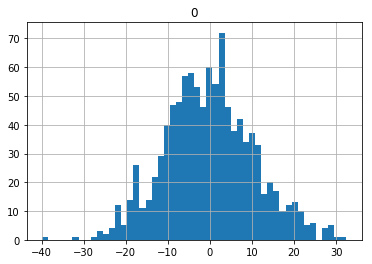

In [30]:
# Lets plot histogram of residuals
e_3=pd.DataFrame(e3)
e_3.hist(bins=50)
plt.show()

In [31]:
import scipy
scipy.stats.shapiro(e3)
# Normality test with p 0.052 shows error is normally distributed.

(0.9970323443412781, 0.05251840129494667)

In [32]:
# Calculate MD for step 3 
x3_MD=x3.copy()
x3_MD['MD']=pd.DataFrame(MD_cal(x3))
x3_MD.head()

,Cement,Blast_Furnace,Fly_Ash,Water,Superplasticizer,Age,MD
0,540.0,0.0,0.0,162.0,2.5,28,10.486780
1,540.0,0.0,0.0,162.0,2.5,28,10.486780
2,332.5,142.5,0.0,228.0,0.0,270,15.580728
3,332.5,142.5,0.0,228.0,0.0,365,27.894179
4,198.6,132.4,0.0,192.0,0.0,360,28.799159


In [33]:
((x3_MD[x3_MD.MD>22.46]).index.values).size
# there are 32 rows which are outliers (where MD>22.46 from x3_MD)

32

In [ ]:
# delete rows where MD>22.46 from x3_MD

In [34]:
# Getting row numbers where MD>22.46
x3_index=(x3_MD[x3_MD.MD>22.46]).index.values

In [ ]:
# x3_MD.drop(x3_MD[x3_MD.MD < 50].index, inplace=True)

In [35]:
x3_index

array([  3,   4,   6,  17,  24,  30,  31,  34,  41,  42,  56,  66,  76,
        79,  99, 102, 122, 125, 145, 148, 168, 171, 228, 604, 610, 616,
       620, 622, 756, 769, 792, 814], dtype=int64)

In [36]:
x4=x3.drop(x3.index[[x3_index]])

In [37]:
y4=y3.drop(y3.index[[x3_index]])

In [38]:
step4model=sm.OLS(y4,x4)
step4result = step4model.fit()

In [39]:
print(step4result.summary())

                             OLS Regression Results                             
Dep. Variable:     compressive_strength   R-squared:                       0.937
Model:                              OLS   Adj. R-squared:                  0.937
Method:                   Least Squares   F-statistic:                     2464.
Date:                  Fri, 16 Feb 2018   Prob (F-statistic):               0.00
Time:                          17:13:29   Log-Likelihood:                -3696.1
No. Observations:                   998   AIC:                             7404.
Df Residuals:                       992   BIC:                             7434.
Df Model:                             6                                         
Covariance Type:              nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Cement              

1)there is improvement in R square , 2) But still D-W test shows +ve autocorrelation

In [40]:
vif_cal(x4)

Cement  VIF =  1.79
Blast_Furnace  VIF =  1.79
Fly_Ash  VIF =  2.48
Water  VIF =  1.87
Superplasticizer  VIF =  2.51
Age  VIF =  1.07


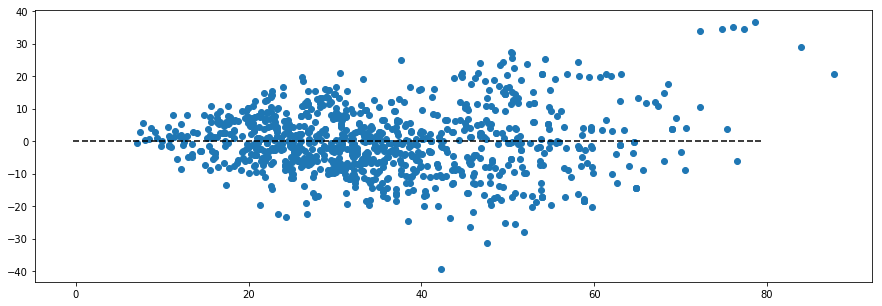

In [41]:
# Residual plot step 4
y_hat4=step4result.predict(x4)
df_yhat4=pd.DataFrame(y_hat4)
df_y4=pd.DataFrame(y4)
e4=(df_yhat4).values-(df_y4).values
# Create Residual plot (e Vs y_hat)
d = pd.DataFrame(np.zeros((80,1)))
plt.figure(figsize=(15,5))
plt.scatter(df_yhat4,e4)
plt.scatter(range(0,80),d,c='k',marker='_')
plt.show()

In [42]:
# P value is very small showing error distribution is not normal
scipy.stats.shapiro(e4)

(0.9922428727149963, 4.302328670746647e-05)

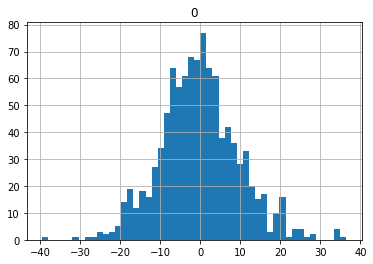

In [43]:
# Lets plot histogram of residuals
e_4=pd.DataFrame(e4)
e_4.hist(bins=50)
plt.show()

As Residual plot of step 4 shows non constant variance , Lets try with 1st order Autocorrelated Error.

In [45]:
# Step 5
x4_index=x4.index.values

In [101]:
# Lets delete 1st row of x5,y5 and Last row of error (e4_df) and then concatenate x5 and e4_df
x5=x4.copy()
y5=y4.copy()
e4_df=pd.DataFrame(e4,index=x4_index,columns=['ax1'])
e5_df=e4_df.copy()
x5.drop(0,inplace=True)
y5.drop(0,inplace=True)
e5_df.drop(1029,inplace=True)

In [123]:
# Adding e4_df as order 1 Autocorrelated errors to x4
x51=x5.reset_index(drop=True)
e51=e5_df.reset_index(drop=True)
y51=y5.reset_index(drop=True)
frames=[x51,e51]
x5_new=pd.concat(frames,axis=1)

In [127]:
step5model=sm.OLS(y51,x5_new)
step5result = step5model.fit()

In [128]:
print(step5result.summary())

                             OLS Regression Results                             
Dep. Variable:     compressive_strength   R-squared:                       0.946
Model:                              OLS   Adj. R-squared:                  0.946
Method:                   Least Squares   F-statistic:                     2489.
Date:                  Fri, 16 Feb 2018   Prob (F-statistic):               0.00
Time:                          18:21:11   Log-Likelihood:                -3612.7
No. Observations:                   997   AIC:                             7239.
Df Residuals:                       990   BIC:                             7274.
Df Model:                             7                                         
Covariance Type:              nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Cement              

In [129]:
vif_cal(x5_new)

Cement  VIF =  1.79
Blast_Furnace  VIF =  1.79
Fly_Ash  VIF =  2.48
Water  VIF =  1.91
Superplasticizer  VIF =  2.52
Age  VIF =  1.08
ax1  VIF =  1.04


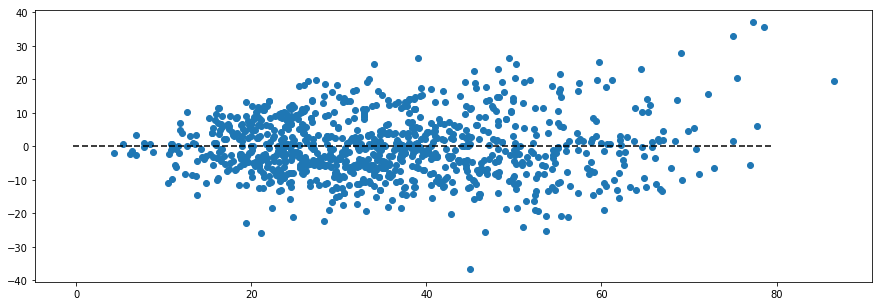

In [135]:
# Residual plot step 5
y_hat5=step5result.predict(x5_new)
df_yhat5=pd.DataFrame(y_hat5)
df_y5=pd.DataFrame(y51)
e5=(df_yhat5).values-(df_y5).values
# Create Residual plot (e Vs y_hat)
d = pd.DataFrame(np.zeros((80,1)))
plt.figure(figsize=(15,5))
plt.scatter(df_yhat5,e5)
plt.scatter(range(0,80),d,c='k',marker='_')
plt.show()

(0.9914984107017517, 1.6522444639122114e-05)

In [137]:
y51.to_csv('C:/Users/IBM_ADMIN/Downloads/y51.csv')
x5_new.to_csv('C:/Users/IBM_ADMIN/Downloads/x51.csv')